In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
#hacky spyder crap
#sys.path.insert(1, 'C:\\Users\\EGR\\AppData\\Roaming\\Python\\Python37\\site-packages')
sys.path.insert(1, 'C:\\projects\\FUI')
#sys.path.insert(1, 'D:\\projects\\FUI\\env\\Lib\\site-packages')
#sys.path.insert(1, 'C:\\Users\\EGR\\AppData\\Roaming\\Python\\Python37\\site-packages')
import pickle
import json
import glob
import re
import copy
import h5py
import codecs
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
#import seaborn as sns


from gensim.models import KeyedVectors
from cycler import cycler
from datetime import datetime
from nltk.stem.snowball import SnowballStemmer
from multiprocessing import Pool
from functools import partial
from matplotlib import pyplot as plt

#local imports
from src.fui.cluster import ClusterTree
from src.fui.indices import merge_lda_u, LDAIndexer
from src.fui.utils import dump_pickle, dump_csv, params, read_hdf, read_h5py

import lemmy
from src.fui.lda import LDA
from src.fui.ldatools import preprocess, optimize_topics, create_dictionary, merge_documents_and_topics
from src.fui.ldatools import jsd_measure, create_corpus, save_models, load_model, print_topics
from src.fui.preprocessing import parse_for_lda, import_scraped_articles


In [4]:
df = merge_lda_u(True, num_topics=90)

In [7]:
df.shape

(1233560, 6)

In [30]:
df.loc[df['not_datetime'] == True]

,Unnamed: 1,body,date,headline,sep=,byline_alt,not_datetime


In [2]:
lemmatizer = lemmy.load("da")
lda_instance = LDA(lemmatizer, test_share=0.0, test=True)

create_dictionary(lda_instance, load_bigrams=True)
create_corpus(lda_instance)

load_model(lda_instance, 85)

Loading processed data from HDF-file
	1231222 documents loaded
Bigram phraser loaded
Loaded pre-existing dictionary
	Dictionary(53160 unique tokens: ['adskillig', 'aktionere', 'anfører', 'arbejdsnedlæggelse', 'arbejdstid']...)
Loaded pre-existing corpus
LDA-model with 85 topics loaded


In [ ]:
len(lda_instance.dictionary.values())

In [4]:
def _load_u_count(sample_size=0,extend=True):
    if extend:
        filename = params().filenames['parsed_news_uc_ext']
    else:
        filename = params().filenames['parsed_news_uc']

    file_path = os.path.join(params().paths['enriched_news'],filename)
    df = read_h5py(file_path)
    df = df[['article_id', 'body', 'u_count', 'n_count', 'word_count']]
    if sample_size > 0:
        return df.sample(sample_size)
    else:
        return df
    
df = _load_u_count()

[1, 2, 3, 11, 12, 14, 20, 27, 28, 32, 34, 36, 38, 40, 41, 42, 52, 55, 56, 58, 59, 60, 63, 64, 68, 69, 70, 72, 75, 76, 78, 80, 83, 84, 85, 88]


C:\Users\Erik\Anaconda3\envs\fui\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


Last month:                   idx         1        2         3        11        12  \
date                                                                    
2020-03-31  1.147449 -0.495314 -0.84848 -0.620344 -0.463716  0.976025   

                  14        20       27        28  ...        70        72  \
date                                               ...                       
2020-03-31  3.330814  1.206091  1.10701 -0.682932  ... -0.841036 -0.340053   

                  75        76        78        80        83        84  \
date                                                                     
2020-03-31 -0.944394 -1.599543 -1.011078 -0.907577 -0.709032  0.704125   

                  85        88  
date                            
2020-03-31  0.549899  0.604478  

[1 rows x 37 columns]


C:\Users\Erik\Anaconda3\envs\fui\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


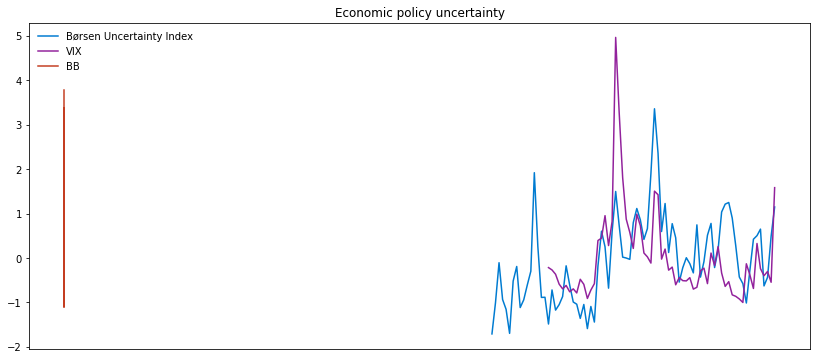

In [108]:
#international = LDAIndexer(name='ep')
#df = international.build(num_topics=90,topics=['EP'],topic_thold=0.5,frq='Q')
#international.plot_index(title='Economic policy uncertainty, international', plot_hh=False)

#domestic = LDAIndexer(name='ep_dk')
#domestic.build(num_topics=80,topics=['EP_dk'],topic_thold=0.5,frq='Q')
#domestic.plot_index(title='Economic policy uncertainty, domestic', plot_hh=False)
b
both = LDAIndexer(name='ep_all')
both.build(num_topics=90,topics=['EP'],topic_thold=0.5,frq='Q')


###Baker bloom 

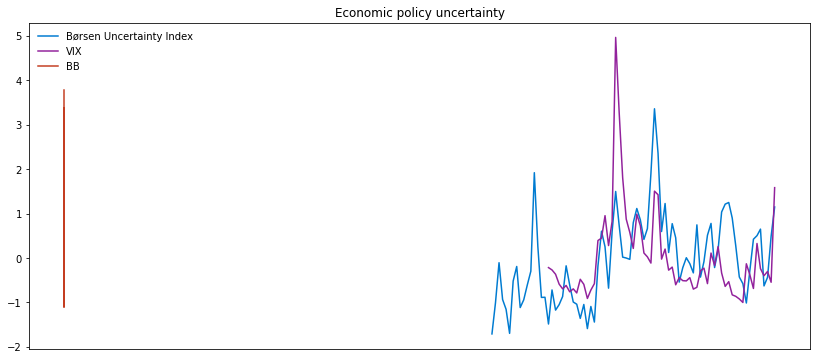

In [110]:
ax = both.plot_index(title='Economic policy uncertainty', plot_vix=True, plot_bloom=True)


In [112]:
bloom = pd.read_csv(params().paths['indices'] + 'bloom_M.csv',
                  names=['date', 'bloom'], header=0)
bloom.set_index('date', inplace=True)


In [128]:
both.idx.index

DatetimeIndex(['2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31',
               '2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
      

In [129]:
bloom.index

Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       ...
       '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
       '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30'],
      dtype='object', name='date', length=244)

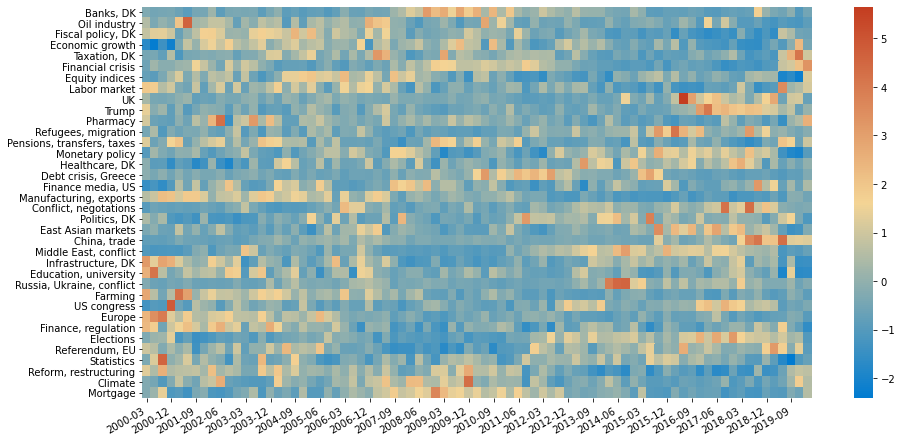

In [85]:
import seaborn as sns
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter("%Y")

label_path = os.path.join(params().paths['topic_labels'],
                          'labels' + str(90) + '.json')
with codecs.open(label_path, 'r', encoding='utf-8-sig') as f:
    labels = json.load(f)



dft=df.drop(columns = ['idx'], axis=1).transpose()
dft.columns = dft.columns.strftime('%Y-%m')

nbcm = LinearSegmentedColormap.from_list(
        'nbcm', [(0/255,123/255,209/255),  (244/255,212/255,149/255), (196/255,61/255,33/255)], N=200)

fig, ax = plt.subplots(1,1, figsize=(15,8))

ax = sns.heatmap(dft, cmap=nbcm, linewidths=0, annot=False, xticklabels =3)
ax.set_yticklabels([labels[str(i)] for i in dft.index])


fig.autofmt_xdate()

['Banks, DK',
 'Oil industry',
 'Fiscal policy, DK',
 'Economic growth',
 'Taxation, DK',
 'Financial crisis',
 'Equity indices',
 'Labor market',
 'UK',
 'Trump',
 'Pharmacy',
 'Refugees, migration',
 'Pensions, transfers, taxes',
 'Monetary policy',
 'Healthcare, DK',
 'Debt crisis, Greece',
 'Finance media, US',
 'Manufacturing, exports',
 'Conflict, negotations',
 'Politics, DK',
 'East Asian markets',
 'China, trade',
 'Middle East, conflict',
 'Infrastructure, DK',
 'Education, university',
 'Russia, Ukraine, conflict',
 'Farming',
 'US congress',
 'Europe',
 'Finance, regulation',
 'Elections',
 'Referendum, EU',
 'Statistics',
 'Reform, restructuring',
 'Climate',
 'Mortgage']

In [65]:
dft.columns = dft.columns.strftime('%Y-%m')

AttributeError: 'Index' object has no attribute 'strftime'

In [64]:
dft.columns

Index(['2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31', '2001-03-31',
       '2001-06-30', '2001-09-30', '2001-12-31', '2002-03-31', '2002-06-30',
       '2002-09-30', '2002-12-31', '2003-03-31', '2003-06-30', '2003-09-30',
       '2003-12-31', '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
       '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31', '2006-03-31',
       '2006-06-30', '2006-09-30', '2006-12-31', '2007-03-31', '2007-06-30',
       '2007-09-30', '2007-12-31', '2008-03-31', '2008-06-30', '2008-09-30',
       '2008-12-31', '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
       '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31', '2011-03-31',
       '2011-06-30', '2011-09-30', '2011-12-31', '2012-03-31', '2012-06-30',
       '2012-09-30', '2012-12-31', '2013-03-31', '2013-06-30', '2013-09-30',
       '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
       '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31',

In [14]:
df.drop(columns = ['idx'], axis=1).transpose()

date,2000-03-31,2000-06-30,2000-09-30,2000-12-31,2001-03-31,2001-06-30,2001-09-30,2001-12-31,2002-03-31,2002-06-30,...,2017-12-31,2018-03-31,2018-06-30,2018-09-30,2018-12-31,2019-03-31,2019-06-30,2019-09-30,2019-12-31,2020-03-31
11,-0.824730,-1.508545,-0.727600,-1.739792,-0.070388,1.090248,-0.132848,1.089679,1.500742,1.321482,...,-1.093626,-1.504563,-1.702128,-1.540881,-1.276929,-0.930686,-0.896038,0.140701,1.624232,-0.414976
14,0.255843,0.868016,0.649414,0.018311,0.648301,0.424571,1.632482,0.941656,0.504010,-0.213885,...,-1.355543,-1.193455,-1.263168,-1.420782,-1.241740,-1.192504,0.810061,1.864876,1.822052,2.573284
20,0.233701,-0.860396,-0.052004,0.593802,1.599073,-0.444824,0.225880,0.169979,1.052790,0.757601,...,-0.835166,-0.940049,-0.304631,0.112336,-0.202836,-0.307957,-2.043788,-1.531023,-1.946985,0.468467
28,1.034798,-0.149885,-0.065033,-0.449837,-0.113993,0.548324,-0.831203,-0.689792,-0.746570,-0.146788,...,0.569231,0.526940,-0.528465,0.745732,1.618020,2.391538,-0.549494,2.214711,1.573307,-0.575303
32,2.385126,0.609590,0.415024,-0.572136,0.305836,-0.840022,-0.326441,0.557786,0.234403,-0.885058,...,2.169008,1.903957,1.874503,2.141832,0.995361,1.015878,-0.626344,0.741589,-0.524008,0.255284
36,0.436784,0.933222,-0.931166,-0.541136,-0.664070,-0.350414,-0.839397,0.041221,-0.755494,-1.054665,...,-0.194307,0.032407,3.655104,0.448571,1.558952,-0.313497,0.158652,1.050224,-0.492242,0.059073
40,0.333215,1.256969,0.775767,-0.261452,0.605530,0.403783,0.396076,-0.140249,-0.777608,-0.133141,...,0.585802,0.005062,1.166445,0.484013,0.330317,-0.433516,-1.810228,-2.327238,-2.536437,-1.391052
42,-0.210441,-0.460550,-0.376305,-0.563790,-0.110903,-0.561848,-0.210331,-0.547551,-0.172809,-0.006042,...,-0.796711,-0.796871,-0.645975,-0.728461,-0.678086,-0.740536,-0.815124,-0.517527,-0.729770,-0.370831
52,-1.102486,-1.105952,-0.675692,-0.695267,0.971377,-0.198154,0.808573,-0.961098,-0.281117,0.022657,...,-0.414290,-0.426922,-0.245306,1.342318,-0.150757,0.667393,-0.415694,0.600050,-0.069780,0.515147
56,-0.984347,-0.364464,-0.335642,-1.108813,-0.883537,-0.890482,-0.732349,-0.480568,-0.830841,-0.544706,...,1.003780,1.323405,3.837264,0.877676,1.695203,1.049818,0.350273,-0.274518,-0.572366,-0.877870


In [58]:
[str(i) for i in range(1,10,1)]

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [28]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, 'C:\\projects\\FUI')
from src.fui.cluster import ClusterTree


cl90 = ClusterTree(90,metric='cosine')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


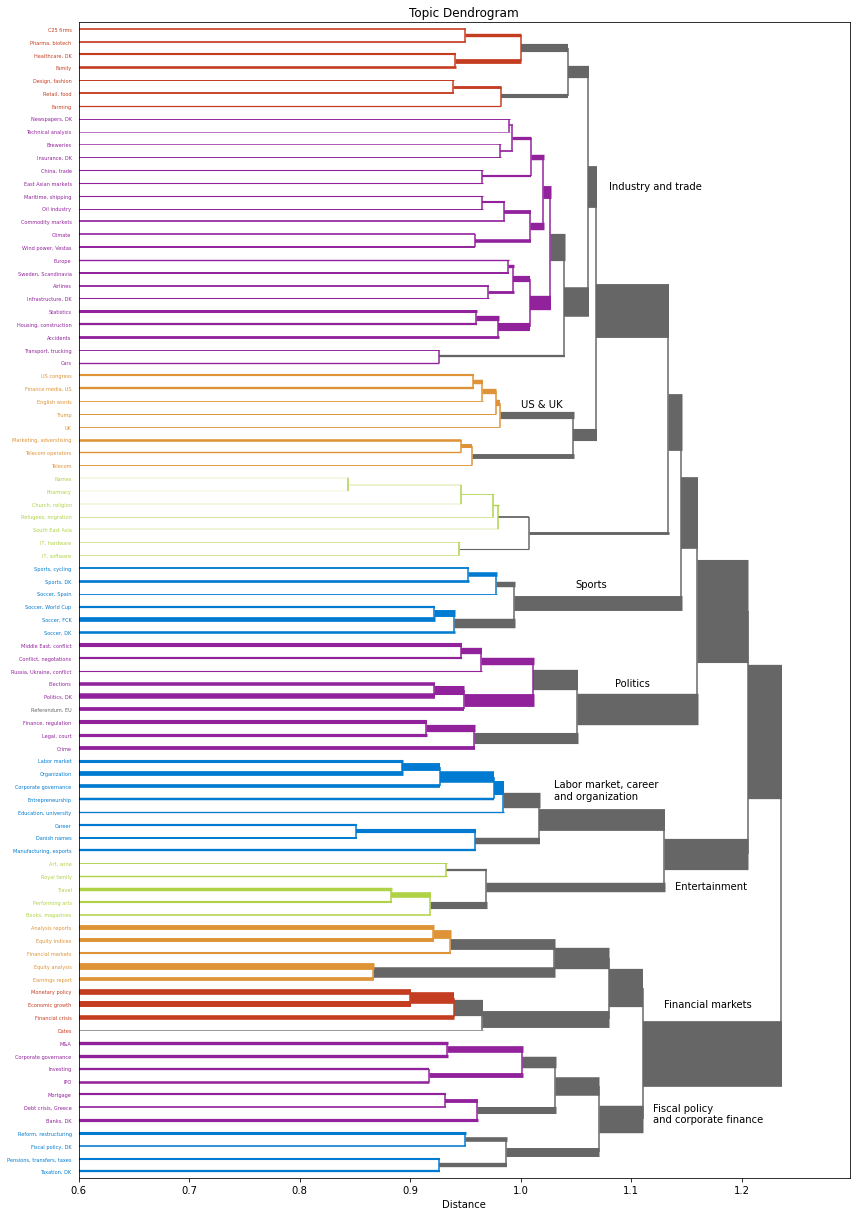

In [34]:
fig, ax, R = cl90.dendrogram(colors=12)

In [33]:
for i,j in enumerate(ax.get_ymajorticklabels()):
    print(i,j)

0 Text(0, 5, 'Taxation, DK')
1 Text(0, 15, 'Pensions, transfers, taxes')
2 Text(0, 25, 'Fiscal policy, DK')
3 Text(0, 35, 'Reform, restructuring')
4 Text(0, 45, 'Banks, DK')
5 Text(0, 55, 'Debt crisis, Greece')
6 Text(0, 65, 'Mortgage')
7 Text(0, 75, 'IPO')
8 Text(0, 85, 'Investing')
9 Text(0, 95, 'Corporate governance')
10 Text(0, 105, 'M&A')
11 Text(0, 115, 'Dates')
12 Text(0, 125, 'Financial crisis')
13 Text(0, 135, 'Economic growth')
14 Text(0, 145, 'Monetary policy')
15 Text(0, 155, 'Earnings report')
16 Text(0, 165, 'Equity analysis')
17 Text(0, 175, 'Financial markets')
18 Text(0, 185, 'Equity indices')
19 Text(0, 195, 'Analysis reports')
20 Text(0, 205, 'Books, magazines')
21 Text(0, 215, 'Performing arts')
22 Text(0, 225, 'Travel')
23 Text(0, 235, 'Royal family')
24 Text(0, 245, 'Art, wine')
25 Text(0, 255, 'Manufacturing, exports')
26 Text(0, 265, 'Danish names')
27 Text(0, 275, 'Career')
28 Text(0, 285, 'Education, university')
29 Text(0, 295, 'Entrepreneurship')
30 Text(0, 

In [23]:
domestic.idx['idx']

,mean
date,
2000-01-31,-0.000010
2000-02-29,0.000018
2000-03-31,-0.000004
2000-04-30,0.000053
2000-05-31,-0.000018
...,...
2018-12-31,-0.000015
2019-01-31,-0.000006
2019-02-28,-0.000003


In [11]:
dom = domestic.labels['EP_dk']
intl = international.labels['EP_int']
df = merge_lda_u()
df['main'] = df['topics'].apply(lambda x : np.argmax(x))
df['u_share'] = ((df['n_count']+df['u_count'])/df['word_count'])*1000


df['idx_dom'] = df['topics'].apply(
    lambda x : np.array([j for i,j in enumerate(x) if (i in dom) and (j >= 0.5)]).sum())
#df['idx_dom'] = df['idx_dom']*df['u_share']
df['idx_intl'] = df['topics'].apply(
    lambda x : np.array([j for i,j in enumerate(x) if (i in intl) and (j >= 0.5)]).sum())
#df['idx_intl'] = df['idx_intl']*df['u_share']

df.set_index('ArticleDateCreated', inplace=True, drop=False)
df = df["2000-01-01":"2019-04-30"]  

In [25]:
mcount_above = df.loc[df['idx_intl'] > 0].groupby(
    [pd.Grouper(key='ArticleDateCreated', freq='M')]
).agg('count')


mcount = df.groupby(
    [pd.Grouper(key='ArticleDateCreated', freq='M')]
).agg('count')


In [26]:
mcount_above = mcount_above.join(mcount, rsuffix='_all')
mcount_above['share'] = mcount_above['article_id'].divide(mcount_above['article_id_all'], axis='index')

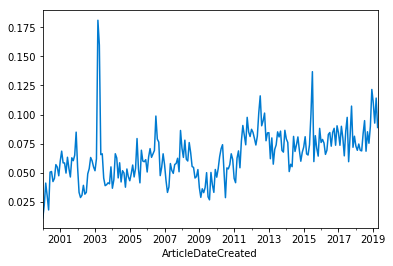

In [29]:
mcount_above['share'].plot()

In [19]:
df = merge_lda_u()
tlist = df.topics.values.tolist()
dlist = df.date.tolist()
for i,j in enumerate(tlist):
    j.append(dlist[i])
    
df = pd.DataFrame(df.topics.values.tolist(), index = df.index)
dft = df.transpose()
dft.columns = dft.columns.strftime('%Y')

with codecs.open(params().paths['topic_labels']+'labels80.json', 'r', encoding='utf-8-sig') as f:
    labels = json.load(f)
    glabs = [v[0] for v in labels.values()]

nbcm = LinearSegmentedColormap.from_list(
        'nbcm', [(0/255,123/255,209/255),  (244/255,212/255,149/255), (196/255,61/255,33/255)], N=200)

nbcm.set_under(color='#ffffff')    
nbcm.set_bad(color='#ffffff')  

plt.clf()
fig, ax = plt.subplots(1,1, figsize=(15,21))
ax = sns.heatmap(dft, cmap=nbcm, linewidths=0, annot=False, xticklabels=4, yticklabels=glabs, vmin=0.001)
ax.set_xlabel(None)
ax.set_title("Mean topic weights")
#ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.savefig(f'data/indices/all_topics_over_time_heatmap.pdf', dpi=300)
plt.show()
plt.close()


AttributeError: 'builtin_function_or_method' object has no attribute 'get_indexer'

In [47]:
df = merge_lda_u()
tlist = df.topics.values.tolist()
dlist = df.date.tolist()
for i,j in enumerate(tlist):
    j.append(dlist[i])
    

In [49]:
df = pd.DataFrame(df.topics.values.tolist(), index = df.index)


In [52]:
df[85]

0         2000-01-03 00:00:00
1         2000-01-03 00:00:00
2         2000-01-03 00:00:00
3         2000-01-03 00:00:00
4         2000-01-03 00:00:00
                  ...        
1231217   2020-04-01 03:17:00
1231218   2020-04-01 03:39:00
1231219   2020-04-01 07:00:00
1231220   2020-04-01 08:28:00
1231221   2020-04-01 09:00:00
Name: 85, Length: 1231222, dtype: datetime64[ns]

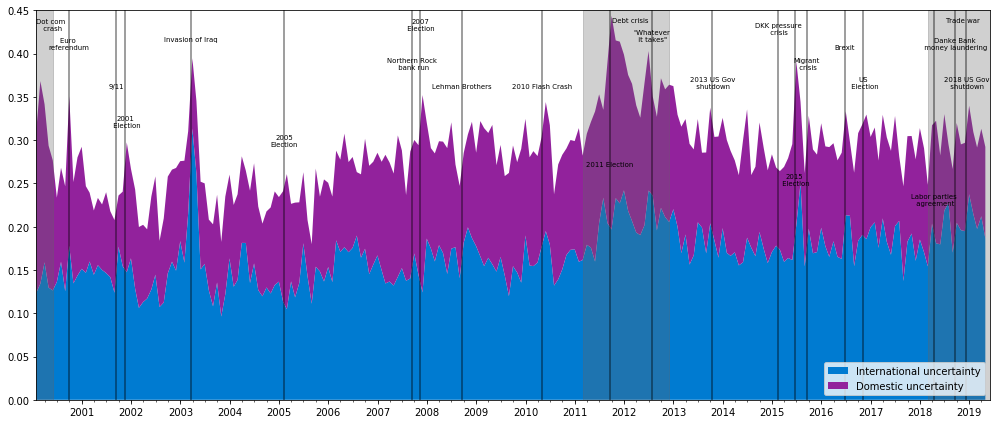

In [40]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator((1, 4, 7, 10))
years_fmt = mdates.DateFormatter('%Y')


df_stack = pd.concat([international.idx['idx'].rename('International'), domestic.idx['idx'].rename('Domestic')], axis=1)

out_path = params().paths['indices']
idx_col = 'idx'

c = cycler(
    'color',
    [
        (0/255, 123/255, 209/255),
        (146/255, 34/255, 156/255),
        (196/255, 61/255, 33/255),
        (223/255, 147/255, 55/255),
        (176/255, 210/255, 71/255),
        (102/255, 102/255, 102/255)
    ])
plt.rcParams["axes.prop_cycle"] = c

fig, ax = plt.subplots(figsize=(14,6))
#ax.plot(international.idx.index, international.idx[idx_col], label='International uncertainty')
#ax.plot(domestic.idx.index, domestic.idx[idx_col], label='Domestic uncertainty')
#ax.plot(both.idx.index, both.idx[idx_col], label='Composite uncertainty')

ax.stackplot(df_stack.index,  df_stack.transpose())
ax.margins(0)
ax.legend(labels=['International uncertainty','Domestic uncertainty'], loc="lower right")
ax.set_ylim(0, 0.45)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)


ax.axvspan(xmin=datetime(2000,1,31), xmax=datetime(2000,5,31), 
           color=(102/255, 102/255, 102/255), alpha=0.3)
ax.annotate("Dot com \n crash", xy=(datetime(2000,5,20), 0.95),  
            xycoords=('data', 'axes fraction'), fontsize='x-small', ha='center')
ax.axvspan(xmin=datetime(2011,3,1), xmax=datetime(2012,11,30), 
           color=(102/255, 102/255, 102/255), alpha=0.3)
ax.annotate("Debt crisis", xy=(datetime(2012,2,15), 0.97),  
            xycoords=('data', 'axes fraction'), fontsize='x-small', ha='center')
ax.axvspan(xmin=datetime(2018,3,1), xmax=datetime(2019,5,31), 
           color=(102/255, 102/255, 102/255), alpha=0.3)
ax.annotate("Trade war", xy=(datetime(2018,11,15), 0.97), 
            xycoords=('data', 'axes fraction'), fontsize='x-small', ha='center')

dates_dict = {'Euro \nreferendum': ['2000-09-28',0.9],
              '9/11': ['2001-09-11',0.8],
              '2001\n Election': ['2001-11-20',0.7],
              'Invasion of Iraq': ['2003-03-19',0.92],
              '2005\nElection': ['2005-02-08',  0.65 ]  ,
              'Northern Rock\n bank run': ['2007-09-14',0.85],
              '2007\n Election': ['2007-11-13',0.95],
              'Lehman Brothers': ['2008-09-15', 0.8],
              '2010 Flash Crash': ['2010-05-06',0.8],
              '2011 Election': ['2011-09-15',0.6],
              '"Whatever\n it takes"': ['2012-07-26', 0.92],
              '2013 US Gov\n shutdown': ['2013-10-15', 0.8],
              'DKK pressure\n crisis': ['2015-02-15',0.94],
              '2015\n Election': ['2015-06-18',0.55],
              'Migrant\n crisis': ['2015-09-15',0.85],
              'Brexit': ['2016-06-23',0.9],
              'US\n Election': ['2016-11-08',0.8],
              'Labor parties\n agreement': ['2018-04-15',0.5],
              'Danke Bank\n money laundering': ['2018-09-15',0.9],
              '2018 US Gov\n shutdown': ['2018-12-10',0.8]}

heights = [0.9, 0.7, 0.8, 0.9, 0.8, 0.9, 0.8, 
           0.97, 0.9, 0.8, 0.7, 0.9, 0.7, 0.95, 0.8,
           0.97, 0.9, 0.7, 0.9, 0.8]

for l, d, h in zip(dates_dict.keys(), [i[0] for i in dates_dict.values()], [i[1] for i in dates_dict.values()]):
    d = datetime.strptime(d, "%Y-%m-%d")
    ax.axvline(x=d, color=(0/255, 0/255, 0/255), alpha=0.5)
    ax.annotate(l, xy=(d, h),  xycoords=('data', 'axes fraction'), 
                fontsize='x-small', ha='center')
#corr = _calc_corr(vix,idx[idx_name])
#ax.text(0.80, 0.95, 'Correlation with VIX: %.2f' % round(corr,2) , transform=ax.transAxes)
plt.tight_layout()
plt.show()
fig.savefig(f'{out_path}stacked_index_plot.png', dpi=300)

In [16]:
df.columns

Index(['article_id', 'date', 'u_count', 'n_count', 'word_count', 'topics',
       'u_share'],
      dtype='object')

In [39]:
agg_share = df[['u_count', 'word_count']].groupby(
    [pd.Grouper(level='ArticleDateCreated', freq='D')]
).agg('sum')
agg_share['u_share'] = (agg_share['u_count']/agg_share['word_count'])*1000
agg_share = agg_share.dropna()
agg_share['rolling'] = agg_share['u_share'].rolling('30d').mean()

In [12]:
agg_share.head(-20)

,u_share,u_count,word_count,rolling
date,,,,
2000-01-03,0.258330,0.150685,425.767123,0.258330
2000-01-04,0.312265,0.084211,393.863158,0.285297
2000-01-05,0.317262,0.175824,381.318681,0.295952
2000-01-06,0.256428,0.111111,339.345679,0.286071
2000-01-07,0.399984,0.149533,389.878505,0.308854
...,...,...,...,...
2020-03-06,0.616023,0.326087,490.913043,0.325483
2020-03-07,0.000000,0.000000,468.166667,0.320696
2020-03-08,0.042872,0.040000,464.800000,0.310526


PermissionError: [Errno 13] Permission denied: 'u_shares_over_time_new.pdf'

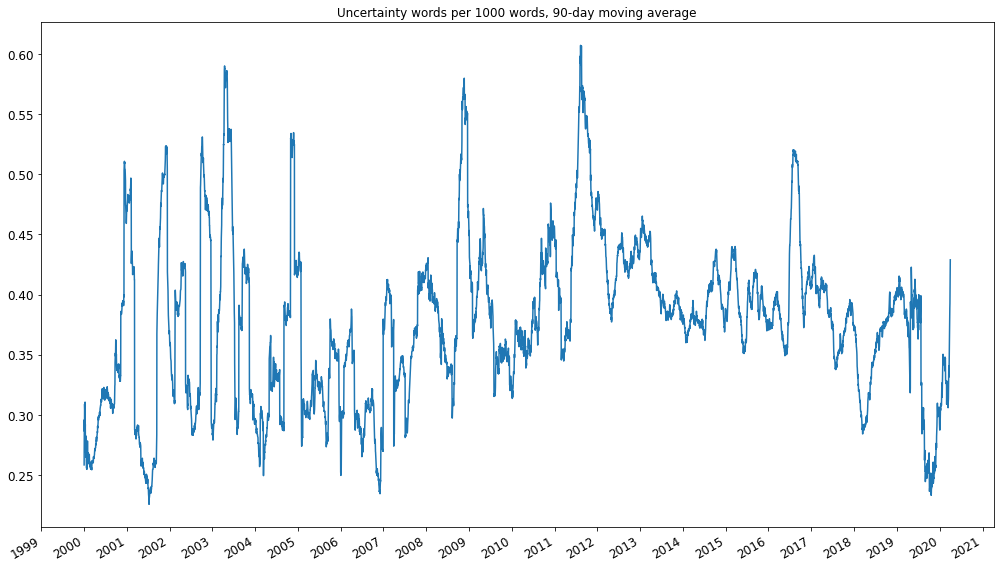

In [57]:
df = merge_lda_u()
df['u_share'] = ((df['n_count']+df['u_count'])/df['word_count'])*1000
agg_share = df[['date', 'u_share','u_count', 'word_count']].groupby(
    [pd.Grouper(key='date', freq='D')]
).agg('mean')
agg_share = agg_share.dropna()
agg_share['rolling'] = agg_share['u_share'].rolling('90d').mean()


years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.plot(agg_share.index, agg_share['rolling'])
ax.set_xlabel(None)
ax.set_title("Uncertainty words per 1000 words, 90-day moving average")
fig.autofmt_xdate()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.tick_params(which='major', labelsize=12)
plt.tight_layout()
plt.savefig(f'u_shares_over_time_new.pdf', dpi=300)
plt.show()

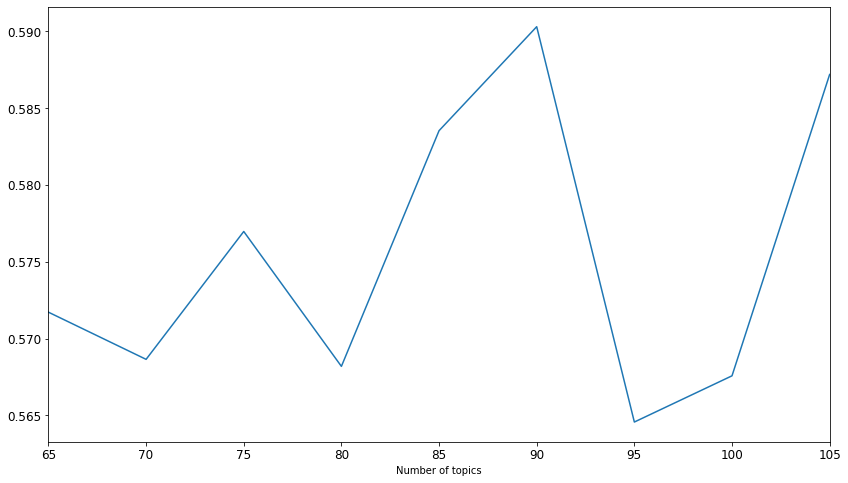

In [52]:
df = pd.read_csv('coherence.csv', names=['Number of topics', 'Coherence score'])
fig = df.sort_values('Number of topics').plot(x='Number of topics', y='Coherence score', figsize=(14,8), legend=False, fontsize=12).get_figure()
fig.savefig('coherence.pdf')


In [73]:
import os
import pandas as pd
import pickle
import re
import h5py
import numpy as np
import warnings
import glob
import html


"""
Loads the data from CSV and performs some basic cleaning. Essentially the
cleaning removes corrupted lines.
"""
# Load the data
csvpath = \
    params().paths['boersen_articles']+params().filenames['boersen_csv']
df = pd.read_csv(csvpath, sep=';', encoding='UTF-16', error_bad_lines=False)

print('Dropping articles with NaN content...')
start_n = df.shape[0] 
# df = df[df['Title']!='test']
df = df[df['ArticleContents'].apply(type) == str]
end_n = df.shape[0]
print('Dropped {} articles with NaN content'.format(start_n-end_n))

print('Dropping articles with SectionName not being string...')
start_n = df.shape[0] 
df = df[df['SectionName'].apply(type) == str]
df = df[df['SectionName'].str.isnumeric() == False]
end_n = df.shape[0]
print('Dropped {} articles with ID as SectionName'.format(start_n-end_n))

df['ArticleDateCreated'] = pd.to_datetime(df['ArticleDateCreated'], format='%Y-%m-%d')


b'Skipping line 356209: expected 14 fields, saw 26\nSkipping line 362883: expected 14 fields, saw 26\nSkipping line 363564: expected 14 fields, saw 26\nSkipping line 368715: expected 14 fields, saw 26\nSkipping line 380336: expected 14 fields, saw 26\nSkipping line 390766: expected 14 fields, saw 26\nSkipping line 390772: expected 14 fields, saw 26\nSkipping line 390773: expected 14 fields, saw 26\nSkipping line 391710: expected 14 fields, saw 26\n'
b'Skipping line 396164: expected 14 fields, saw 26\nSkipping line 398416: expected 14 fields, saw 26\nSkipping line 400339: expected 14 fields, saw 26\nSkipping line 412393: expected 14 fields, saw 26\nSkipping line 413690: expected 14 fields, saw 26\nSkipping line 426457: expected 14 fields, saw 26\nSkipping line 430740: expected 14 fields, saw 25\nSkipping line 434030: expected 14 fields, saw 26\nSkipping line 445846: expected 14 fields, saw 26\n'
b'Skipping line 472984: expected 14 fields, saw 26\nSkipping line 476010: expected 14 fields

In [104]:
counts = df.groupby([pd.Grouper(key='ArticleDateCreated', freq='M')])['Supplier'].apply(lambda x: x.value_counts())
counts = counts.unstack(fill_value=0)

df['word_count'] = df['ArticleContents'].str.count(' ') + 1
word_counts = df.groupby([pd.Grouper(key='ArticleDateCreated', freq='M'), 'Supplier'])['word_count'].agg('mean')
word_counts = word_counts.unstack(fill_value=0)


In [106]:
word_counts.head(20)
#df.groupby(
#    [pd.Grouper(key='ArticleDateCreated', freq='M')]
#).agg('count')


Supplier,Blog,Bo Bedre,Børsen,Børsen Weekend,Direkt-SE,E-Avis,E-Avis arkiv,Magasinet Pleasure,Ritzau,TDN
ArticleDateCreated,,,,,,,,,,
1996-06-30,0.0,0.0,0.000000,0.0,0.0,0.0,39.835366,0.0,0.0,0.0
1996-07-31,0.0,0.0,0.000000,0.0,0.0,0.0,39.501664,0.0,0.0,0.0
1996-08-31,0.0,0.0,0.000000,0.0,0.0,0.0,39.820494,0.0,0.0,0.0
1996-09-30,0.0,0.0,0.000000,0.0,0.0,0.0,39.559567,0.0,0.0,0.0
1996-10-31,0.0,0.0,0.000000,0.0,0.0,0.0,39.507190,0.0,0.0,0.0
1996-11-30,0.0,0.0,0.000000,0.0,0.0,0.0,39.502399,0.0,0.0,0.0
1996-12-31,0.0,0.0,0.000000,0.0,0.0,0.0,39.442017,0.0,0.0,0.0
1997-01-31,0.0,0.0,0.000000,0.0,0.0,0.0,39.536424,0.0,0.0,0.0
1997-02-28,0.0,0.0,0.000000,0.0,0.0,0.0,39.820072,0.0,0.0,0.0


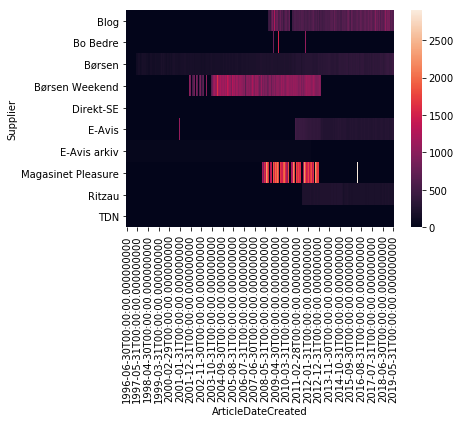

In [105]:
sns.heatmap(word_counts.transpose())